In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import warnings

filename = r'D:\0-Summer Pre\boot camp\group project\Ford-Data-GroupProject.xlsx'
Ford = pd.read_excel(filename , header=0)

In [2]:
#--------------------------------
#Basic Information about the data 

print(Ford.head())
print(Ford.shape)
print(Ford.info())

     model  year transmission fuelType  engineSize  price  mileage  tax   mpg
0   Fiesta  2017    Automatic   Petrol         1.0  12000    15944  150  57.7
1    Focus  2018       Manual   Petrol         1.0  14000     9083  150  57.7
2    Focus  2017       Manual   Petrol         1.0  13000    12456  150  57.7
3   Fiesta  2019       Manual   Petrol         1.5  17500    10460  145  40.3
4   Fiesta  2019    Automatic   Petrol         1.0  16500     1482  145  48.7
(17966, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   transmission  17966 non-null  object 
 3   fuelType      17966 non-null  object 
 4   engineSize    17966 non-null  float64
 5   price         17966 non-null  int64  
 6   mileage       17966 non-null  int64  
 7   tax           17966 n

In [3]:
#drop the unrealistic year = 2060 as an input error

Ford.drop(Ford.index[Ford['year'] > 2022], inplace=True)

In [4]:
#categorical variables:

for i in ['model','transmission','fuelType','tax']:
    print('prices vary across '+ i +' :')
    price_by_i = pd.DataFrame(Ford.groupby(i)['price'].mean())
    i_count = Ford[i].value_counts()
    price_by_i_count_srt = pd.concat([price_by_i,i_count] , axis=1).sort_values('price')
    print(price_by_i_count_srt)
    print('\n')

prices vary across model :
                               price  model
 Streetka                1924.500000      2
 Fusion                  2555.812500     16
 Escort                  3000.000000      1
 KA                      5186.125628    199
 B-MAX                   8287.526761    355
Focus                    8299.000000      1
 Ka+                     8707.856874    531
 C-MAX                   9914.567219    543
 Fiesta                 10196.862569   6556
 Grand C-MAX            10881.574899    247
 Mondeo                 12305.709125    526
 Transit Tourneo        12450.000000      1
 EcoSport               12499.268591   1143
 Focus                  13185.882956   4588
 Tourneo Connect        13805.818182     33
 Ranger                 14495.000000      1
 Grand Tourneo Connect  14874.915254     59
 Kuga                   15823.472360   2225
 S-MAX                  17720.226351    296
 Galaxy                 17841.872807    228
 Tourneo Custom         21165.985507     69
 Puma

<AxesSubplot:xlabel='fuelType', ylabel='price'>

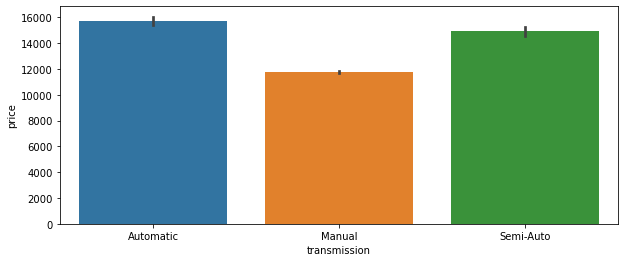

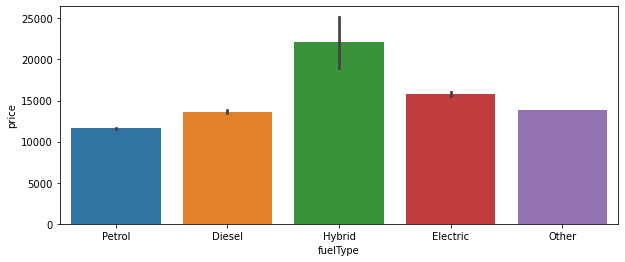

In [5]:
#how categorical variables attribute to price

fig=plt.figure(figsize=(10,4))
sns.barplot(x = Ford.transmission, y = Ford.price)

fig=plt.figure(figsize=(10,4))
sns.barplot(x = Ford.fuelType, y = Ford.price)

In [6]:
#mean price of Semi-Auto and Automatic is similar, divide the transmission of cars into 'manual' and assign as 1, 'not manual' assign as 2
#similarly assign fuelType as 'not Hybrid' and 'Hybrid'

##mapping, and assign new columns

trans_mapping = {'Manual':1,'Semi-Auto':2,'Automatic':2}
Ford['trans_num'] = Ford['transmission'].replace(trans_mapping)

fuel_mapping = {'Petrol':1,'Diesel':1,'Other':1,'Electric':1,'Hybrid':2}
Ford['fuel_num'] = Ford['fuelType'].replace(fuel_mapping)

#Merge, to reduce the interference of categorical data to the regression

[[1.         0.64546504]
 [0.64546504 1.        ]]


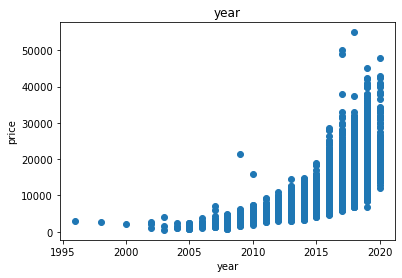

[[1.        0.2589846]
 [0.2589846 1.       ]]


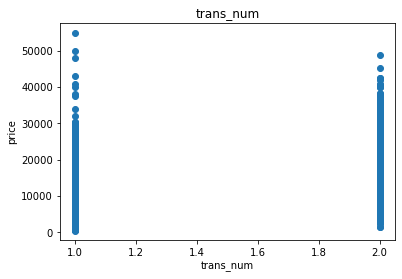

[[1.         0.07288931]
 [0.07288931 1.        ]]


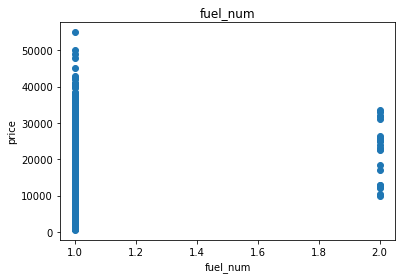

[[1.       0.411203]
 [0.411203 1.      ]]


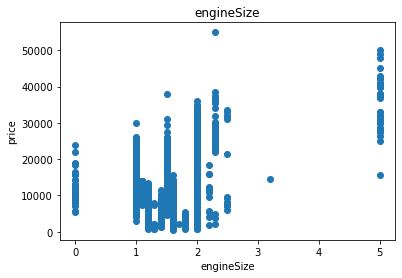

[[ 1.         -0.53060994]
 [-0.53060994  1.        ]]


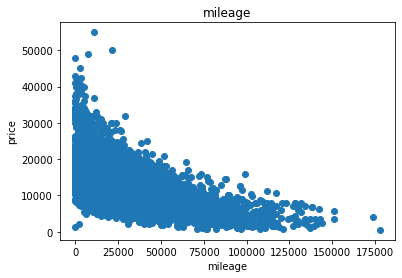

[[1.         0.40699933]
 [0.40699933 1.        ]]


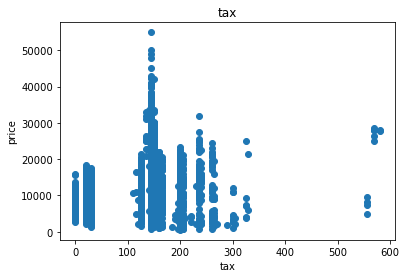

[[ 1.         -0.34655662]
 [-0.34655662  1.        ]]


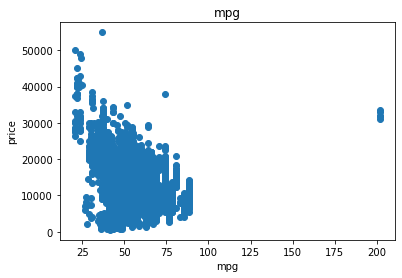

In [7]:
#how numeric variables attribute to price

for i in ['year','trans_num','fuel_num','engineSize','mileage','tax','mpg']:
    x = Ford[i]
    y = Ford['price']
    print(np.corrcoef(Ford[i],Ford['price']))
    plt.scatter(x, y, marker='o')
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('price')
    plt.show()

[[1.         0.77352907]
 [0.77352907 1.        ]]


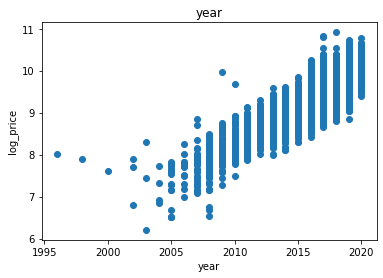

[[ 1.         -0.62649271]
 [-0.62649271  1.        ]]


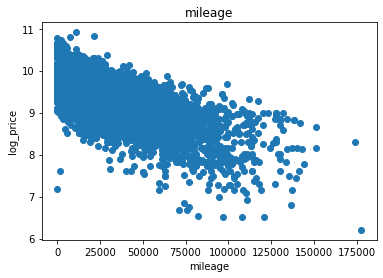

In [8]:
#most engineSize fall near 0 and between 1-3
#most tax fall near 0 and between 100-350
#most mpg fall between 10-90, with a few high outliers

#year & mileage seemed to be correlated with log(price)
Ford['log_price'] = np.log(Ford['price'])

for i in ['year','mileage']:
    x = Ford[i]
    y = Ford['log_price']
    print(np.corrcoef(Ford[i],Ford['log_price']))
    plt.scatter(x, y, marker='o')
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('log_price')
    plt.show()

<AxesSubplot:>

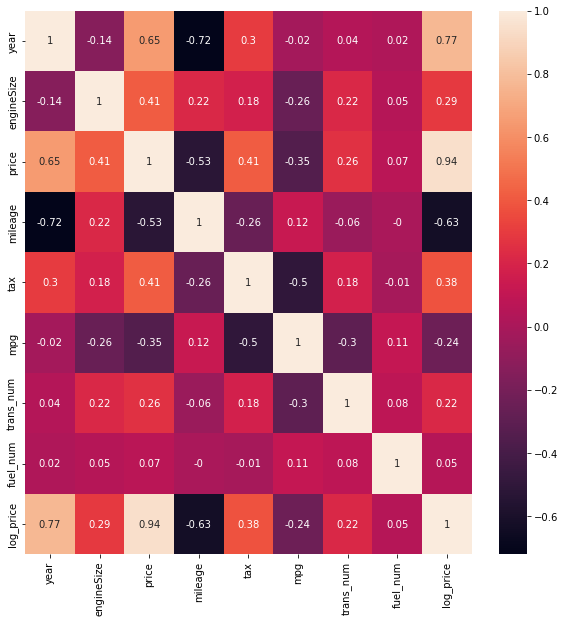

In [9]:
# Correlation Matrix - states the relation between each column
correlation_matrix = Ford.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True, ax = ax)

In [10]:
#Model 1

#year has 0.65 correlation with price, mileage has -0.53 correlation with price,
#meanwhile year and mileage have -0.72 correlation with each other, are highly dependent

#engineSize and tax both have 0.41 correlation with price
#tax have -0.5 correlation with mpg

#Model1: X = year, mileage, engineSize, tax, Y = price

In [11]:
#Model 2

#year has 0.77 correlation with log_price, mileage has -0.63 correlation with log_price,
#meanwhile year and mileage have -0.72 correlation with each other, are highly dependent

#tax 0.38,and tax has -0.5 correlation with mpg
# engineSize 0.29

#Model2: X = year, mileage, engineSize, tax, Y = log_price

In [12]:
# converting the daya set into array
X1 = np.array(pd.concat([Ford['year'],Ford['mileage'],Ford['engineSize'],Ford['tax']],axis=1))
Y1 = Ford['price'].values
X2 = np.array(pd.concat([Ford['year'],Ford['mileage'],Ford['engineSize'],Ford['tax']],axis=1))
Y2 = Ford['log_price'].values

# splitting the dataset into train and test. 30% of the whole data is for testing
x1_train, x1_test, y1_train, y1_test = train_test_split(X1,Y1, test_size=0.3, random_state = 42)
x2_train, x2_test, y2_train, y2_test = train_test_split(X2,Y2, test_size=0.3, random_state = 42)

print(x1_train == x2_train)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 ...
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [13]:
#Apllying Multiple linear regression model on the dataset
Ford_model1 = LinearRegression()
Ford_model1.fit(x1_train, y1_train)
Ford_model2 = LinearRegression()
Ford_model2.fit(x2_train, y2_train)

#Predicting the train data using the linear model
y1_pred_train = Ford_model1.predict(x1_train)
y2_pred_train = Ford_model2.predict(x2_train)

#Predicting the test data using the Linear model
y1_pred_test = Ford_model1.predict(x1_test)
y2_pred_test = Ford_model2.predict(x2_test)

print("Coefficients of the Linear Regression Model 1:", Ford_model1.coef_)
print("Intercept of the Linear Regression Model 1:", Ford_model1.intercept_)
print("Coefficients of the Linear Regression Model 2:", Ford_model2.coef_)
print("Intercept of the Linear Regression Model 2:", Ford_model2.intercept_)

Coefficients of the Linear Regression Model 1: [ 1.21292845e+03 -6.04409697e-02  5.67107198e+03  6.50246287e+00]
Intercept of the Linear Regression Model 1: -2441011.0945755113
Coefficients of the Linear Regression Model 2: [ 1.30621388e-01 -4.95493934e-06  3.92918890e-01  2.47154619e-04]
Intercept of the Linear Regression Model 2: -254.5480523731459


In [14]:
#Formula of the model1:
#price = 1.21292845e+03*year - 6.04409697e-02*mileage + 5.67107198e+03*engineSize + 6.50246287e+00*tax - 2441011.0945755113

#Formula of the model2:
#log_price = 1.30621388e-01*year - 4.95493934e-06*mileage + 3.92918890e-01*engineSize + 2.47154619e-04*tax - 254.5480523731459

In [15]:
# Evaluating them odel using R^2 and Mean Square Error
print("Evaluation of Model 1:")
print("Train Data:")
print("R2:", metrics.r2_score(y1_train, y1_pred_train))
print('MSE:', metrics.mean_squared_error(y1_train, y1_pred_train))
print("Test Data:")
print("R2:", metrics.r2_score(y1_test, y1_pred_test))
print('MSE:', metrics.mean_squared_error(y1_test, y1_pred_test))
print()
print("Evaluation of Model 2:")
print("Train Data:")
print("R2:", metrics.r2_score(y2_train, y2_pred_train))
print('MSE:', metrics.mean_squared_error(y2_train, y2_pred_train))
print("Test Data:")
print("R2:", metrics.r2_score(y2_test, y2_pred_test))
print('MSE:', metrics.mean_squared_error(y2_test, y2_pred_test))

Evaluation of Model 1:
Train Data:
R2: 0.7171205257472901
MSE: 6328658.5325517915
Test Data:
R2: 0.7045192726008103
MSE: 6715130.612902848

Evaluation of Model 2:
Train Data:
R2: 0.7912761725664388
MSE: 0.03405826853750039
Test Data:
R2: 0.7856161317308468
MSE: 0.03535325769257484


C:\Users\yujia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


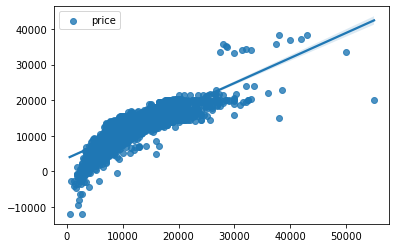

C:\Users\yujia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


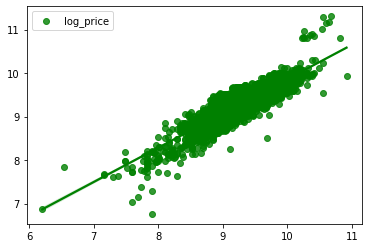

In [16]:
model1 = sns.regplot(y1_test,y1_pred_test,label='price')
model1.legend(loc="best")
plt.show()
model2 = sns.regplot(y2_test,y2_pred_test,label='log_price',color='g')
model2.legend(loc="best")
plt.show()

In [17]:
# Viewing the Actual and Predicted test data
y1_pred_test_prop = 100 * (y1_pred_test - y1_test) / y1_test
y2_pred_test_prop = 100 * ( np.exp(y2_pred_test) - np.exp(y2_test)) / np.exp(y2_test)

pd.DataFrame({"Actual price1 $": y1_test,"Model1 Predict $": y1_pred_test, 'Percentage difference1 %':y1_pred_test_prop,\
              "Actual price2 $": np.exp(y2_test),"Model2 Predict $": np.exp(y2_pred_test), 'Percentage difference2 %':y2_pred_test_prop})

,Actual price1 $,Model1 Predict $,Percentage difference1 %,Actual price2 $,Model2 Predict $,Percentage difference2 %
0,12495,15337.935630,22.752586,12495.0,14238.186007,13.951068
1,8999,10358.034754,15.102064,8999.0,9911.860278,10.144019
2,7998,9453.844850,18.202611,7998.0,8595.231905,7.467266
3,5491,3878.884776,-29.359228,5491.0,5323.545407,-3.049619
4,3790,2495.748208,-34.149124,3790.0,3772.756562,-0.454972
...,...,...,...,...,...,...
5385,4298,6974.165945,62.265378,4298.0,6977.403922,62.340715
5386,10800,12134.821939,12.359462,10800.0,11846.210762,9.687137
5387,6597,7950.857907,20.522327,6597.0,7589.529923,15.045171
5388,10250,8964.412441,-12.542318,10250.0,8631.733142,-15.787969
